In [2]:
# import display libs
from IPython.display import Image
%matplotlib inline
from IPython.display import Latex

In [17]:
# import libs
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


# setup figure params
figureparams = {'axes.labelsize': 24,
           'axes.titlesize': 20,
           'axes.linewidth': 1.3,
           'font.size': 20,
           'legend.fontsize': 18,
           'figure.figsize': (10,7),
           'font.family': 'serif',
           'font.serif': 'Computer Modern Roman',
           'xtick.labelsize': 18,
           'xtick.major.size': 5.5,
           'xtick.major.width': 1.3,
           'ytick.labelsize': 18,
           'ytick.major.size': 5.5,
           'ytick.major.width': 1.3,
           'text.usetex': True,
           'figure.autolayout': True}
plt.rcParams.update(figureparams)
matplotlib.rcParams['text.usetex']=False
matplotlib.rcParams['text.latex.unicode']=True
matplotlib.get_configdir()

C:\Users\EdwardJansenADC\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.


'C:\\Users\\EdwardJansenADC\\.matplotlib'

# Bootstrap of mean
### Contents
    1. Construction ...
    2. blalba

## 1. Bla

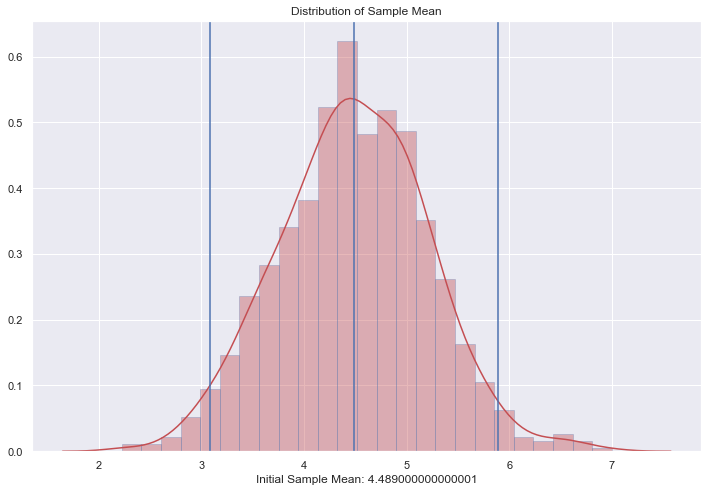

In [228]:

# generate data
sample = np.round(np.random.rand(20)*10, 2)

# configure bootstrap
def bootstrap(data, p, n=1000, func=np.mean):
    """
    Generate `n` bootstrap samples, evaluating `func`
    at each resampling. `bootstrap` returns a function,
    which can be called to obtain confidence intervals
    of interest.
    """
    simulations = list()
    sample_size = len(data)
    for i in range(n):
        itersample = np.random.choice(data, size=sample_size, replace=True)
        simulations.append(func(itersample))
    simulations.sort()
    def confidence_interval(p):
        """
        Return 2-sided symmetric confidence interval specified
        by p.
        """
        u_pval = (1+p)/2.
        l_pval = (1-u_pval)
        l_idx = int(np.floor(n*l_pval))
        u_idx = int(np.floor(n*u_pval))
        return(simulations[l_idx],simulations[u_idx])
    return simulations, confidence_interval(p)

sim, bounds = bootstrap(sample, p = 0.95)


"""
Generate a histogram of the distribution of sample means 
"""

import seaborn as sns
sns.set(style="darkgrid")

sns.distplot(sim, color='r', kde=True, hist_kws=dict(edgecolor="b", linewidth=.675))
plt.xlabel("Initial Sample Mean: {}".format(np.mean(sample)))
plt.title("Distribution of Sample Mean")
plt.axvline(x=np.mean(sample))     # vertical line at xbar_init
plt.axvline(x=bounds[0])
plt.axvline(x=bounds[1])
plt.show()